<a href="https://colab.research.google.com/github/OSGeoLabBp/tutorials/blob/master/hungarian/machine_learning/lessons/outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kilógó értékek (durvahibák) kiszűrése Isolation forest és DBSCAN algoritmussal

Az Isolation forest egy gyors felügyelet nélküli anomália detektáló algoritmus, mely két csoportba sorolja az elemeket. N dimenziós esetben is használható.

A SBSCAN egy kevésbé gyors osztályozó eljárás, mely zajszűrésre is alkalmas. Az osztályok számát nem kell előre megadni. N dimnziós esetben is használható.

Célszerű normalizálni az adatokat, ha azok nagyságrendje eltérő.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

Hozzunk létre egy kettődimenziós, több centrum körül szimmetrikus, normális eloszlású adathalmazt (X) és adjunk hozzá durvahibás (kilógó) értékeket (X_ourliers).

In [ ]:
centers = 3
n_samples = 300

In [ ]:
X, y = make_blobs(n_samples=n_samples, n_features=2, centers=centers, cluster_std=0.8) #, random_state=42)
X_outliers = np.random.uniform(low=-6, high=6, size=(20, 2))
X = np.vstack([X, X_outliers])

Alakítsuk át standard normális eloszlásúvá az adathalmazt, ez főleg akkor fontos, ha különböző nagyságú értékek vannak az egyes dimenziókban.

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Hozzuk létre az Isolation forest modellünket 5% kiugró értéket feltételezve, majd illesszük a modellt az adatainkra.

In [ ]:
model = IsolationForest(contamination=0.05) #, random_state=42)
model.fit(X_scaled)

IsolationForest(contamination=0.05)

Válasszuk szét hibás és hibátlan értékeket!

In [ ]:
outlier_preds = model.predict(X_scaled) # returns -1 for outliers, 1 for inliers
anomaly_scores = model.decision_function(X_scaled) # the more negative, the more anomalous

Hozzunk létre egy DBSCAN modelt is.

In [ ]:
db = DBSCAN(eps=0.2, min_samples=10)
y_db = db.fit_predict(X_scaled)

Ábrázoljuk az eredményt.

Kilógó értékek száma: 16


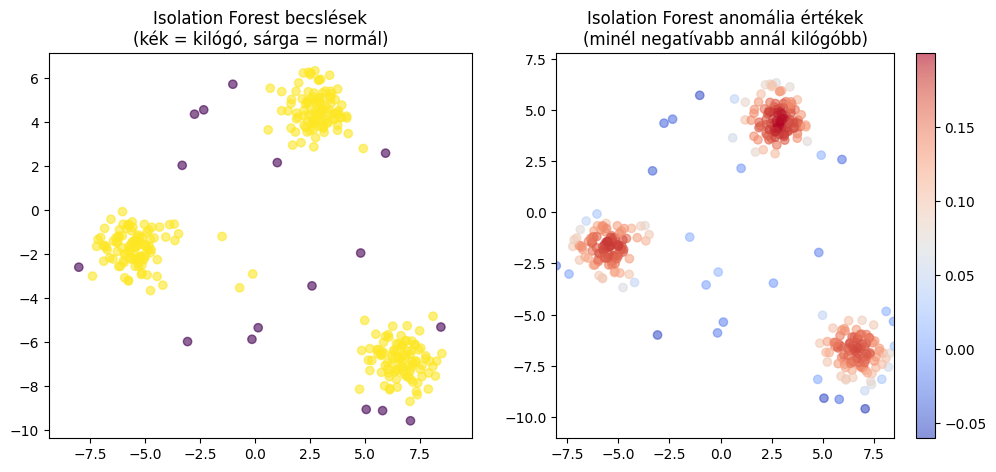

In [ ]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 5))
plt.axis('equal')
plt.xlim(min(X[:, 0]), max(X[:, 0]))
plt.ylim(min(X[:, 1]), max(X[:, 1]))


# Plot the original data with outlier predictions
ax0.set_aspect('equal', adjustable="datalim")
ax0.scatter(X[:, 0], X[:, 1], c=outlier_preds, alpha=0.6)
ax0.set_title('Isolation Forest becslések\n(kék = kilógó, sárga = normál)')
#plt.colorbar(scatter, ax=ax0)

# Plot the data colored by anomaly score
ax1.set_aspect('equal', adjustable="datalim")
scatter = ax1.scatter(X[:, 0], X[:, 1], c=anomaly_scores, cmap='coolwarm', alpha=0.6)
ax1.set_title('Isolation Forest anomália értékek\n(minél negatívabb annál kilógóbb)')
plt.colorbar(scatter, ax=ax1)

# Identify the outlier points (optional)
# Get the indices of the outlier rows in the original data
outlier_indices = np.where(outlier_preds == -1)[0]
print(f"Kilógó értékek száma: {len(outlier_indices)}")

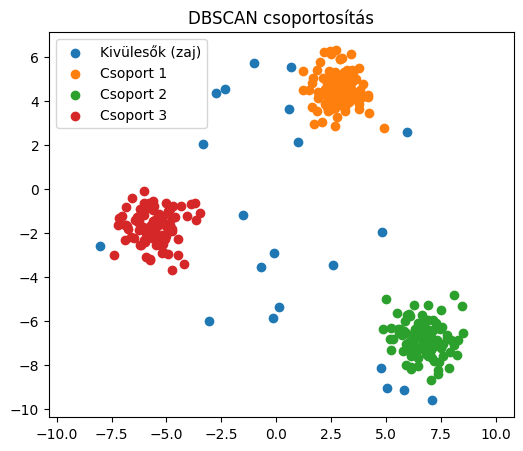

In [ ]:
fig, (ax2) = plt.subplots(1, 1, figsize=(6, 5))
ax2.set_aspect('equal', adjustable="datalim")
for cluster in np.unique(y_db):
	# csoporthoz tartozók kikeresése és ábrázolása
	row_ix = np.where(y_db == cluster)
	ax2.scatter(X[row_ix, 0], X[row_ix, 1], label= f"Csoport {cluster+1}" if cluster > -1 else "Kivülesők (zaj)")
# show the plot
ax2.set_title('DBSCAN csoportosítás')
_ = ax2.legend()
